In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
from datetime import timedelta

# 사이킷런
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
pd.set_option('display.max_row', 5000)
pd.set_option('display.max_columns', 100)

from matplotlib import font_manager, rc
import matplotlib
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

# 데이터 로드 및 날짜 컬럼 생성

In [3]:
sang18_tomato_raw=pd.read_excel("C:\\농업기술원\\1차\\2018\\2018-2019 토마토_생육(원본)/현가농장_김대만_생육.xlsx",sheet_name='1819생육')

In [4]:
2018-2019 토마토_환경(원본)env18_tomato_raw=pd.read_excel("C:\\농업기술원\\1차\\2018\\2018-2019 토마토_환경(원본)/현가농장_김대만_환경.xlsx")

In [5]:
sang18_tomato=sang18_tomato_raw[['Date','Year','Month','Day','Sample','초장','생장길이']]

In [6]:
sang18_tomato.head(10)

,Date,Year,Month,Day,Sample,초장,생장길이
0,2018-09-10,2018,9,10,1,123.0,NaN
1,2018-09-10,2018,9,10,2,123.0,NaN
2,2018-09-10,2018,9,10,3,125.0,NaN
3,2018-09-10,2018,9,10,4,123.0,NaN
4,2018-09-10,2018,9,10,5,122.0,NaN
5,2018-09-10,2018,9,10,6,124.0,NaN
6,2018-10-01,2018,10,1,1,NaN,29.133333
7,2018-10-01,2018,10,1,2,NaN,30.333333
8,2018-10-01,2018,10,1,3,NaN,29.200000
9,2018-10-01,2018,10,1,4,NaN,29.333333


In [7]:
# sang18_tomato_바구리봉임윤호=sang18_tomato_바구리봉임윤호.dropna().reset_index(drop=True)

In [8]:
env18_tomato=env18_tomato_raw[['date','내부온도','내부습도','누적일사량']]

In [9]:
env18_tomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414077 entries, 0 to 414076
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    414077 non-null  datetime64[ns]
 1   내부온도    414077 non-null  float64       
 2   내부습도    414077 non-null  float64       
 3   누적일사량   414077 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 12.6 MB


In [10]:
env18_tomato['year']=env18_tomato['date'].dt.year
env18_tomato['month']=env18_tomato['date'].dt.month
env18_tomato['day']=env18_tomato['date'].dt.day

<ipython-input-10-5d4eab50a663>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  env18_tomato['year']=env18_tomato['date'].dt.year
<ipython-input-10-5d4eab50a663>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  env18_tomato['month']=env18_tomato['date'].dt.month
<ipython-input-10-5d4eab50a663>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [11]:
env18_tomato.head(5)

,date,내부온도,내부습도,누적일사량,year,month,day
0,2018-08-20 00:00:01,25.1,85.7,2240,2018,8,20
1,2018-08-20 00:01:01,25.1,85.6,2240,2018,8,20
2,2018-08-20 00:02:00,25.1,85.4,2240,2018,8,20
3,2018-08-20 00:03:00,25.1,84.9,2240,2018,8,20
4,2018-08-20 00:04:00,25.1,85.0,2240,2018,8,20


# 사용자 함수 모음--------------------------------------------

In [114]:
def 이중축그래프(data,x,y,title,hue="Sample"):
    fig, ax0=plt.subplots(figsize=(15,7))

    ax1 = ax0.twinx()
    sns.lineplot(data=data,
                y=y,
                x='Date',
                hue=hue,ax=ax0)
    sns.lineplot(data=data,
                y=x,
                x='Date',ax=ax1,color='green')
    plt.title(title)
    plt.plot()

In [119]:
def 다항회귀함수(data,degree,x,y,title,xlab,ylab):
    poly_features = PolynomialFeatures(degree=degree)
    pred_x=np.linspace(16,24,len(data))

    X = np.array(data[x]).reshape(-1,1)
    y = np.array(data[y]).reshape(-1,1)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression(fit_intercept=False)
    lr.fit(X_poly,y)
    sort_df=pd.DataFrame({'x':X.flatten(), 
                        'y':lr.predict(X_poly).flatten()}).sort_values('x')

    
    plt.figure(figsize=(15,8))
    plt.scatter(X.flatten(),y.flatten(),s=3, c="black")
    plt.plot(sort_df['x'], sort_df['y'])
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

# 생육 데이터 초장, 최종길이 구하기

In [13]:
sang18_tomato.head(10)

,Date,Year,Month,Day,Sample,초장,생장길이
0,2018-09-10,2018,9,10,1,123.0,NaN
1,2018-09-10,2018,9,10,2,123.0,NaN
2,2018-09-10,2018,9,10,3,125.0,NaN
3,2018-09-10,2018,9,10,4,123.0,NaN
4,2018-09-10,2018,9,10,5,122.0,NaN
5,2018-09-10,2018,9,10,6,124.0,NaN
6,2018-10-01,2018,10,1,1,NaN,29.133333
7,2018-10-01,2018,10,1,2,NaN,30.333333
8,2018-10-01,2018,10,1,3,NaN,29.200000
9,2018-10-01,2018,10,1,4,NaN,29.333333


In [14]:
sang18_tomato2=sang18_tomato.pivot_table(index=['Sample'],
                         values='생장길이',
                         aggfunc=sum).reset_index()

In [15]:
sang18_tomato2['최종길이']=sang18_tomato2['생장길이']+sang18_tomato['초장'][0:6]

In [16]:
sang18_tomato2

,Sample,생장길이,최종길이
0,1,656.233333,779.233333
1,2,631.133333,754.133333
2,3,646.600000,771.600000
3,4,600.033333,723.033333
4,5,589.700000,711.700000
5,6,592.600000,716.600000


# 12시 기준으로 끊기

In [17]:
생육조사기간=sorted(list(set(list(sang18_tomato['Date']))))
df=pd.DataFrame()
for i in range(len(생육조사기간)-1):
    start_i = 생육조사기간[i]+timedelta(hours=12)
    end_i = 생육조사기간[i+1]+timedelta(hours=12)

    df2 = env18_tomato[(env18_tomato['date']>=start_i) & (env18_tomato['date']<end_i)]
    df2['Date']=생육조사기간[i+1]
    
    #누적일사량 해결
    df2['lag_누적일사량']=df2['누적일사량'].shift(1)
    df2['일사량2']=df2['누적일사량']-df2['lag_누적일사량']
    
    #음수를 0으로 치환 NA를 0으로 치환
    df2['일사량2_치환']=df2['일사량2'].apply(lambda x : 0 if x<0 else x)
    df2['일사량']=df2['일사량2_치환'].fillna(0)

    del df2['lag_누적일사량']
    del df2['일사량2']
    del df2['일사량2_치환']
    df=pd.concat([df,df2])
    

<ipython-input-17-cb4bfb77e478>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date']=생육조사기간[i+1]
<ipython-input-17-cb4bfb77e478>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['lag_누적일사량']=df2['누적일사량'].shift(1)
<ipython-input-17-cb4bfb77e478>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [18]:
df=df.reset_index(drop=True)

In [124]:
생육조사기간

[Timestamp('2018-09-10 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2018-10-08 00:00:00'),
 Timestamp('2018-10-15 00:00:00'),
 Timestamp('2018-10-22 00:00:00'),
 Timestamp('2018-10-29 00:00:00'),
 Timestamp('2018-11-05 00:00:00'),
 Timestamp('2018-11-12 00:00:00'),
 Timestamp('2018-11-19 00:00:00'),
 Timestamp('2018-11-26 00:00:00'),
 Timestamp('2018-12-03 00:00:00'),
 Timestamp('2018-12-10 00:00:00'),
 Timestamp('2018-12-17 00:00:00'),
 Timestamp('2018-12-24 00:00:00'),
 Timestamp('2018-12-31 00:00:00'),
 Timestamp('2019-01-07 00:00:00'),
 Timestamp('2019-01-14 00:00:00'),
 Timestamp('2019-01-21 00:00:00'),
 Timestamp('2019-01-28 00:00:00'),
 Timestamp('2019-02-04 00:00:00'),
 Timestamp('2019-02-11 00:00:00'),
 Timestamp('2019-02-18 00:00:00'),
 Timestamp('2019-02-25 00:00:00'),
 Timestamp('2019-03-04 00:00:00'),
 Timestamp('2019-03-11 00:00:00'),
 Timestamp('2019-03-18 00:00:00'),
 Timestamp('2019-03-25 00:00:00'),
 Timestamp('2019-04-01 00:00:00')]

# 환경데이터 실험주차수 컬럼 만들기

In [19]:
df.head(5)

,date,내부온도,내부습도,누적일사량,year,month,day,Date,일사량
0,2018-09-10 12:00:00,28.0,67.7,900,2018,9,10,2018-10-01,0.0
1,2018-09-10 12:01:00,28.0,64.0,904,2018,9,10,2018-10-01,4.0
2,2018-09-10 12:02:00,28.0,63.1,909,2018,9,10,2018-10-01,5.0
3,2018-09-10 12:03:00,28.1,63.8,914,2018,9,10,2018-10-01,5.0
4,2018-09-10 12:04:00,28.2,64.4,919,2018,9,10,2018-10-01,5.0


In [20]:
# Date별로 집계
date_temp=df.pivot_table(index='Date',
                  values='내부온도',
                  aggfunc='mean').reset_index(drop=False)
date_temp

,Date,내부온도
0,2018-10-01,21.778199
1,2018-10-08,20.238571
2,2018-10-15,19.368327
3,2018-10-22,19.208194
4,2018-10-29,18.704653
5,2018-11-05,18.764702
6,2018-11-12,18.010298
7,2018-11-19,17.964858
8,2018-11-26,17.071567
9,2018-12-03,17.232530


In [21]:
#주차 추가하기
test_week=len(date_temp['Date'].unique())
test_week

27

In [46]:
sang18_tomato['주차']=list(np.repeat(list(np.linspace(0,test_week,test_week+1)),6))

<ipython-input-46-36f36e5f8817>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sang18_tomato['주차']=list(np.repeat(list(np.linspace(0,test_week,test_week+1)),6))


In [123]:
sang18_tomato.head(10)

,Date,Year,Month,Day,Sample,초장,생장길이,주차
0,2018-09-10,2018,9,10,1,123.0,NaN,0.0
1,2018-09-10,2018,9,10,2,123.0,NaN,0.0
2,2018-09-10,2018,9,10,3,125.0,NaN,0.0
3,2018-09-10,2018,9,10,4,123.0,NaN,0.0
4,2018-09-10,2018,9,10,5,122.0,NaN,0.0
5,2018-09-10,2018,9,10,6,124.0,NaN,0.0
6,2018-10-01,2018,10,1,1,NaN,29.133333,1.0
7,2018-10-01,2018,10,1,2,NaN,30.333333,1.0
8,2018-10-01,2018,10,1,3,NaN,29.200000,1.0
9,2018-10-01,2018,10,1,4,NaN,29.333333,1.0


In [48]:
time_sang18_tomato=sang18_tomato.pivot(index=['Sample'],
                               columns='주차',
                               values=['생장길이']).reset_index()
time_sang18_tomato['생장길이'][0]=sang18_tomato['초장'][0:6]

<ipython-input-48-596eec21ecfb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_sang18_tomato['생장길이'][0]=sang18_tomato['초장'][0:6]


In [49]:
sang18_tomato['초장'][0:6]

0    123.0
1    123.0
2    125.0
3    123.0
4    122.0
5    124.0
Name: 초장, dtype: float64

In [50]:
time_sang18_tomato['생장길이',0]=sang18_tomato['초장'][0:6]

In [51]:
time_sang18_tomato.columns=time_sang18_tomato.columns.droplevel([0])

In [52]:
time_sang18_tomato.columns=['Sample',  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]

In [62]:
# 최종 키
time_sang18_tomato.apply(sum,axis=1)-time_sang18_tomato['Sample']

0    779.233333
1    754.133333
2    771.600000
3    723.033333
4    711.700000
5    716.600000
dtype: float64

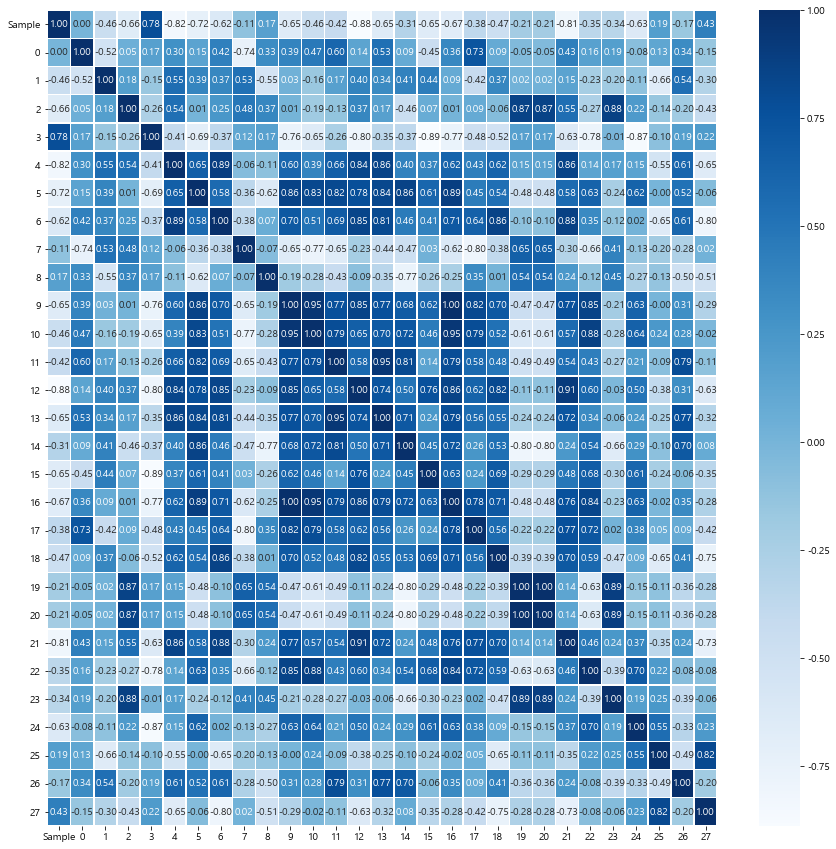

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(data = time_sang18_tomato.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# 생육-환경 데이터 조사일기준으로 온도평균, 야간내부습도평균, 누적일사량

### 1. 평균온도

In [67]:
avg_temp = df.pivot_table(index = ['Date'],
                         values='내부온도',
                         aggfunc='mean')

In [68]:
avg_temp.head(5)

,내부온도
Date,
2018-10-01,21.778199
2018-10-08,20.238571
2018-10-15,19.368327
2018-10-22,19.208194
2018-10-29,18.704653


### 1-1 평균온도에서 필요한 데이터

In [117]:
# 생육과 환경조인
join_sang_env_temp = pd.merge(sang18_tomato,avg_temp,on='Date',how='inner')
join_sang_env_temp.head(6)

,Date,Year,Month,Day,Sample,초장,생장길이,주차,내부온도
0,2018-10-01,2018,10,1,1,NaN,29.133333,1.0,21.778199
1,2018-10-01,2018,10,1,2,NaN,30.333333,1.0,21.778199
2,2018-10-01,2018,10,1,3,NaN,29.200000,1.0,21.778199
3,2018-10-01,2018,10,1,4,NaN,29.333333,1.0,21.778199
4,2018-10-01,2018,10,1,5,NaN,29.900000,1.0,21.778199
5,2018-10-01,2018,10,1,6,NaN,28.000000,1.0,21.778199


In [118]:
# 위 데이터에서 주차별 샘플의 평균 생장길이 집계 데이터
sample_mean_join_sang_env_temp=join_sang_env_temp.pivot_table(index = ['Date','주차','내부온도'],
                              values='생장길이',
                              aggfunc='mean').reset_index()
sample_mean_join_sang_env_temp.head(6)

,Date,주차,내부온도,생장길이
0,2018-10-01,1.0,21.778199,29.316667
1,2018-10-08,2.0,20.238571,25.500000
2,2018-10-15,3.0,19.368327,24.033333
3,2018-10-22,4.0,19.208194,23.783333
4,2018-10-29,5.0,18.704653,22.000000
5,2018-11-05,6.0,18.764702,24.450000


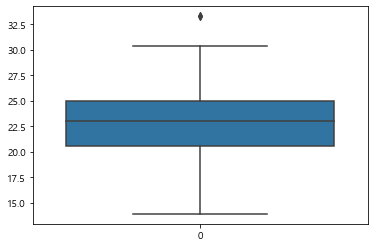

In [70]:
sns.boxplot(data=join_sang_env_temp['생장길이'])

## 개체별로 내부온도에 따른 초장길이의 변화

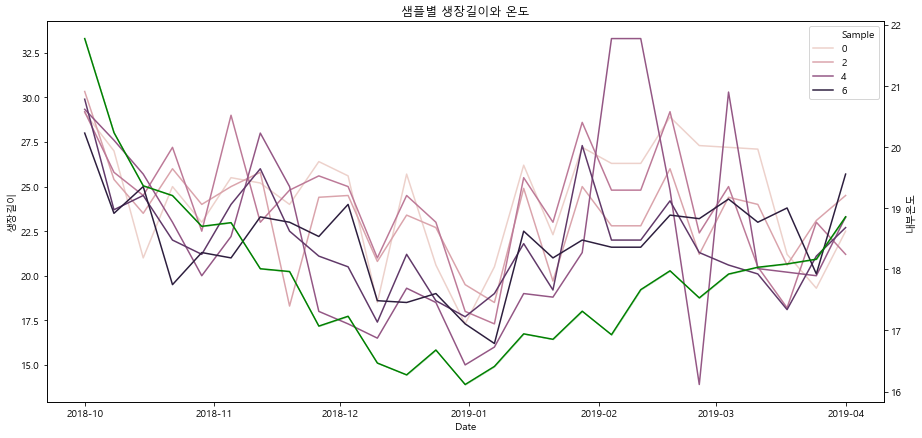

In [115]:
이중축그래프(data=join_sang_env_temp,x='내부온도',y='생장길이',
      title='샘플별 생장길이와 온도')

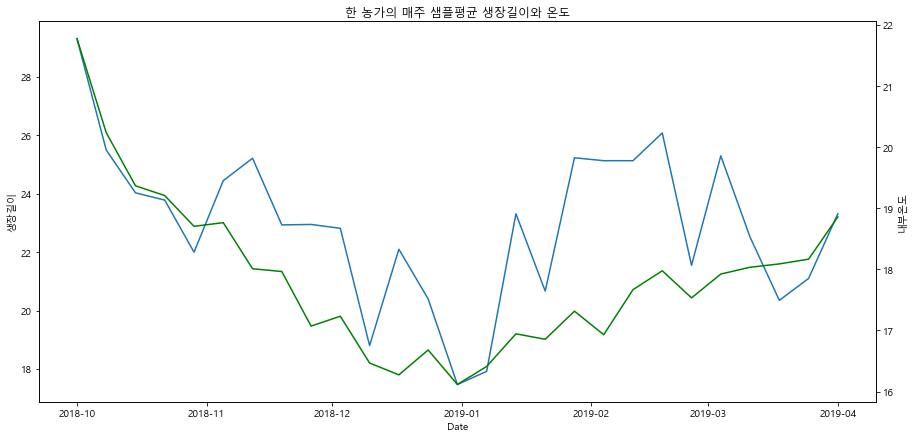

In [116]:
이중축그래프(data=sample_mean_join_sang_env_temp,x='내부온도',y='생장길이',hue=None,
      title='한 농가의 매주 샘플평균 생장길이와 온도')

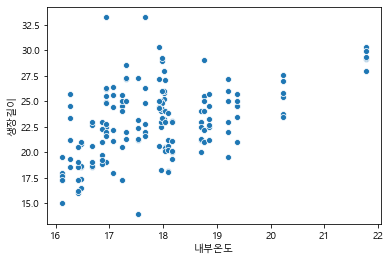

In [73]:
sns.scatterplot(data=join_sang_env_temp,x='내부온도',y='생장길이')

In [74]:
join_sang_env_temp.corr()

,Year,Month,Day,Sample,초장,생장길이,주차,내부온도
Year,1.000000,-0.980051,-0.081446,0.000000e+00,NaN,-0.012642,0.866025,-2.141737e-01
Month,-0.980051,1.000000,0.053668,0.000000e+00,NaN,-0.034077,-0.754913,1.493389e-01
Day,-0.081446,0.053668,1.000000,0.000000e+00,NaN,-0.304363,0.029477,-3.229325e-01
Sample,0.000000,0.000000,0.000000,1.000000e+00,NaN,-0.249159,0.000000,5.086523e-18
초장,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
생장길이,-0.012642,-0.034077,-0.304363,-2.491587e-01,NaN,1.000000,-0.177066,4.972617e-01
주차,0.866025,-0.754913,0.029477,0.000000e+00,NaN,-0.177066,1.000000,-3.979418e-01
내부온도,-0.214174,0.149339,-0.322933,5.086523e-18,NaN,0.497262,-0.397942,1.000000e+00


In [75]:
from statsmodels.formula.api import ols

In [76]:
res = ols('생장길이 ~ 내부온도', data=join_sang_env_temp).fit()

In [77]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   생장길이   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     52.56
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           1.68e-11
Time:                        09:45:27   Log-Likelihood:                -411.97
No. Observations:                 162   AIC:                             827.9
Df Residuals:                     160   BIC:                             834.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0357      3.454     -0.589      0.556      -8.856       4.785
내부온도           1.3974      0.193      7.250      0.000       1.017       1.778
==============================================================================
Omnibus:                       14.984   Durbin-Watson:                   1.415
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.547
Skew:                           0.604   Prob(JB):                     9.39e-05
Kurtosis:                       4.136   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

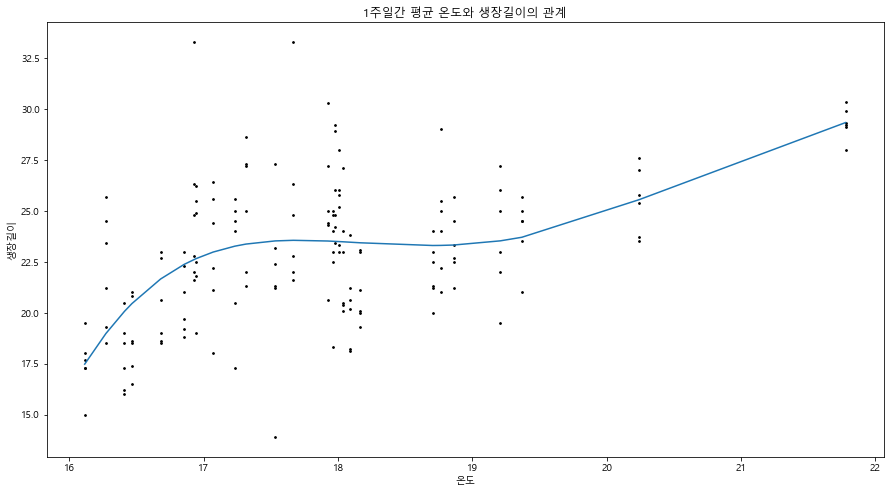

In [120]:
다항회귀함수(data = join_sang_env_temp,x='내부온도',y='생장길이',degree=4,
      title='1주일간 평균 온도와 생장길이의 관계',xlab='온도',ylab='생장길이')

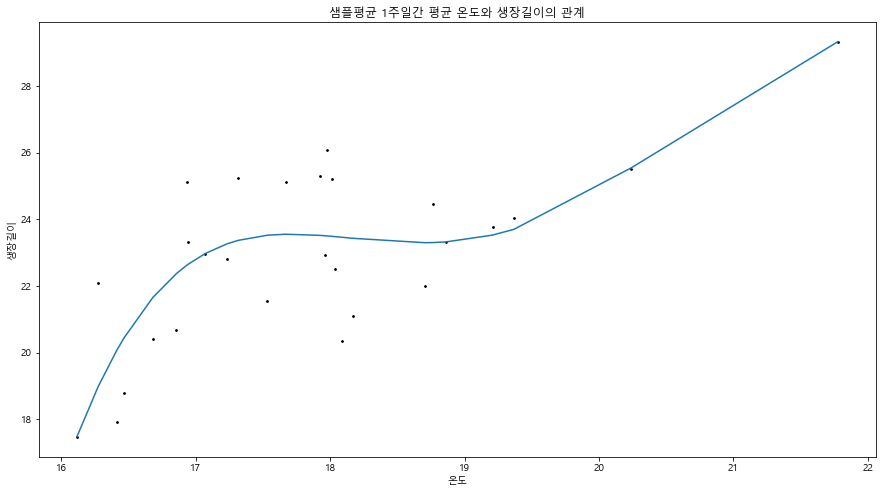

In [122]:
다항회귀함수(data = sample_mean_join_sang_env_temp,x='내부온도',y='생장길이',degree=4,
      title='샘플평균 1주일간 평균 온도와 생장길이의 관계',xlab='온도',ylab='생장길이')

## 2. 일사량

In [127]:
avg_sun = df.pivot_table(index = ['Date'],
                         values='일사량',
                         aggfunc='sum')

In [137]:
join_sang_env_sun = pd.merge(sang18_tomato,avg_sun,on='Date',how='inner')
join_sang_env_sun['일사량']=join_sang_env_sun['일사량']
join_sang_env_sun.head(10)

,Date,Year,Month,Day,Sample,초장,생장길이,주차,일사량
0,2018-10-01,2018,10,1,1,NaN,29.133333,1.0,29353.0
1,2018-10-01,2018,10,1,2,NaN,30.333333,1.0,29353.0
2,2018-10-01,2018,10,1,3,NaN,29.200000,1.0,29353.0
3,2018-10-01,2018,10,1,4,NaN,29.333333,1.0,29353.0
4,2018-10-01,2018,10,1,5,NaN,29.900000,1.0,29353.0
5,2018-10-01,2018,10,1,6,NaN,28.000000,1.0,29353.0
6,2018-10-08,2018,10,8,1,NaN,27.000000,2.0,9104.0
7,2018-10-08,2018,10,8,2,NaN,25.400000,2.0,9104.0
8,2018-10-08,2018,10,8,3,NaN,25.800000,2.0,9104.0
9,2018-10-08,2018,10,8,4,NaN,27.600000,2.0,9104.0


In [138]:
# 위 데이터에서 주차별 샘플의 평균 생장길이 집계 데이터
sample_mean_join_sang_env_sun=join_sang_env_sun.pivot_table(index = ['Date','주차','일사량'],
                              values='생장길이',
                              aggfunc='mean').reset_index()
sample_mean_join_sang_env_sun.head(6)

,Date,주차,일사량,생장길이
0,2018-10-01,1.0,29353.0,29.316667
1,2018-10-08,2.0,9104.0,25.500000
2,2018-10-15,3.0,10561.0,24.033333
3,2018-10-22,4.0,9774.0,23.783333
4,2018-10-29,5.0,7006.0,22.000000
5,2018-11-05,6.0,9280.0,24.450000


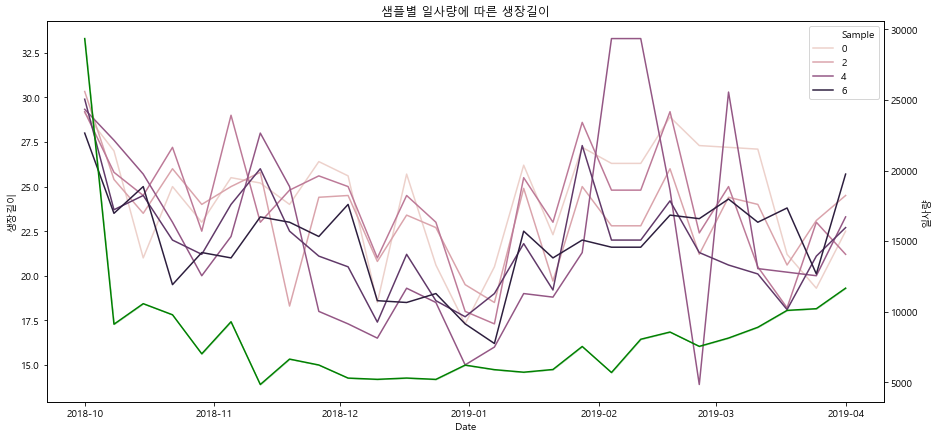

In [139]:
이중축그래프(data=join_sang_env_sun,x='일사량',y='생장길이',title='샘플별 일사량에 따른 생장길이')

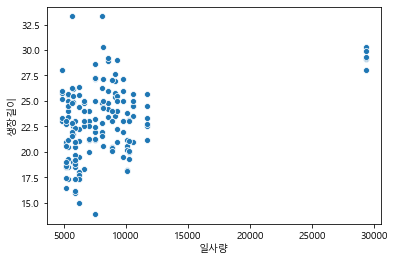

In [140]:
sns.scatterplot(data=join_sang_env_sun,x='일사량',y='생장길이')

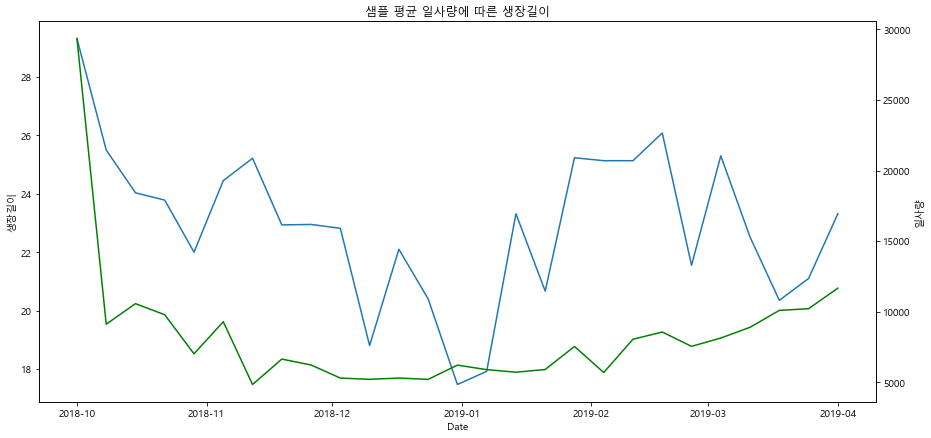

In [141]:
이중축그래프(data=sample_mean_join_sang_env_sun,x='일사량',y='생장길이',title='샘플 평균 일사량에 따른 생장길이',hue=None)

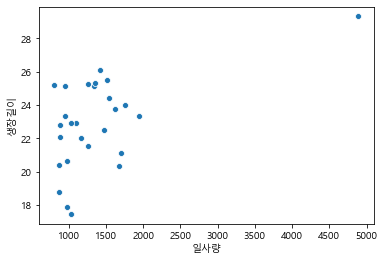

In [136]:
sns.scatterplot(data=sample_mean_join_sang_env_sun,x='일사량',y='생장길이')